In [1]:
from pathlib import Path
import pygimli as pg  # Stelle sicher, dass das Modul pg importiert ist und verfügbar ist
from pygimli.physics import ert
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime
import os
import numpy as np

from Hilfsfunktionen import T_corr_nach_Inversion
from Hilfsfunktionen import plotting_function
from Hilfsfunktionen import plotting_function_FTL

results_tl = []
results_tl_Tcorr = []
chi2_oT = []
chi2_wT = []
for lam, nr in zip([10, 50, 100, 200], [0,1,2,3]):
    file = "two_timesteps_240710_240808.ohm"
    two_timesteps = True
    base_dir = Path("filtered_data")
    data = []
    for unterordner in base_dir.iterdir():
        if unterordner.is_dir():
            datei_pfad = unterordner / "two_timesteps_240710_240808.ohm" 
            if datei_pfad.exists():
                daten_objekt = pg.load(str(datei_pfad))
                data.append([unterordner.name, daten_objekt])
                print(f"Load data: {datei_pfad}")
    
    # Create method manager
    manager = []
    for ts in data:
        manager.append(ert.ERTManager(ts[1], verbose=True))
    
    # Inversion without Tcorr
    manager_list_tl = []
    chi2 = []
    for mgr,mgr_number in zip(manager, range(len(manager))):
        print(mgr_number)
        if mgr_number == 1:
            dat = mgr.data
            dataD = dat.copy()
            dataD["rhoa"] = dat["rhoa"] * manager[mgr_number-1].inv.response / manager[mgr_number-1].inv.dataVals
            manager_list_tl.append(ert.Manager(dataD))
            results_tl.append(manager_list_tl[mgr_number].invert(manager_list_tl[mgr_number].data, quality=34,paraMaxCellSize=0.5,
                        paraDepth=15,lam=lam, dPhi= 0.1, startModel=results_tl[0], isReference = True, verbose = True))
            chi2.append(round(manager_list_tl[mgr_number].inv.chi2(),2))
        if mgr_number == 0:
            manager_list_tl.append(mgr)
            results_tl.append(mgr.invert(mgr.data, quality=34,paraMaxCellSize=0.5, 
                                         dPhi= 0.1, paraDepth=15,lam=15, verbose= True))
            chi2.append(round(mgr.inv.chi2(),2))
    chi2_oT.append(chi2)
    
    # Temperature correction
    ort_2 = 'Georg-Westermann-Park'
    results_tl_corr = [] 
    temp_spread = []
    timestep = 0
    mesh2 = manager[0].mesh.createSubMesh(manager[0].mesh.cells(manager[0].mesh.cellMarkers() == 2))
    for count, m in enumerate(results_tl):
        if two_timesteps:
            add = 10
        else:
            add = 0
        timestep = count+add
        dateien = os.listdir(r".\Temperature_data/" + ort_2 )
        for datei in dateien: 
            if (datei).startswith('T_Profil%s_array' % (str(timestep))):
                print(datei)
                Temp_tiefe_vektor = np.load(r'.\Temperature_data/%s/' % (ort_2) + datei, allow_pickle=True)
        res_new,Tem_new = T_corr_nach_Inversion(m, mesh2, Temp_tiefe_vektor)
        results_tl_corr.append(res_new) 
        temp_spread.append(Tem_new)

    for resu, resu_corr, man, wen in zip(results_tl,results_tl_corr,manager_list_tl, data):
        response = man.inv.fop.response(resu)
        response_t_corr = man.inv.fop.response(resu_corr)
        difference = response_t_corr - response
        wen[1]['rhoa'] = wen[1]['rhoa'] + difference  
        
    # Inversion with temperature correction
    manager_list_tl = []
    chi2 = []
    for mgr,mgr_number in zip(manager, range(len(manager))):
        print(mgr_number)
        if mgr_number == 1:
            dat = mgr.data
            dataD = dat.copy()
            dataD["rhoa"] = dat["rhoa"] * manager[mgr_number-1].inv.response / manager[mgr_number-1].inv.dataVals
            manager_list_tl.append(ert.Manager(dataD))
            results_tl_Tcorr.append(manager_list_tl[mgr_number].invert(manager_list_tl[mgr_number].data, quality=34,paraMaxCellSize=0.5,
                        paraDepth=15,lam=lam, dPhi= 0.1, startModel=results_tl_Tcorr[0], isReference = True, verbose = True))
            chi2.append(round(manager_list_tl[mgr_number].inv.chi2(),2)) 
        if mgr_number == 0:
            manager_list_tl.append(mgr)
            results_tl_Tcorr.append(mgr.invert(mgr.data, quality=34,paraMaxCellSize=0.5, 
                                         dPhi= 0.1, paraDepth=15,lam=15, verbose= True))
            chi2.append(round(mgr.inv.chi2(),2))
    chi2_wT.append(chi2)
    

[NbConvertApp] Converting notebook Hilfsfunktionen.ipynb to script
[NbConvertApp] Writing 24706 bytes to Hilfsfunktionen.py


Load data: filtered_data\240710\two_timesteps_240710_240808.ohm
Load data: filtered_data\240808\two_timesteps_240710_240808.ohm
0


24/04/25 - 03:16:29 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:16:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:16:30 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:16:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:16:30 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 03:16:30 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 03:16:31 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 03:16:32 - pyGIMLi - INFO - Use median(data values)=2043.9
24/04/25 - 03:16:32 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=2043.900000/2043.900000
24/04/25 - 03:16:32 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001356BAF8680>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516BEDE0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001355138CD60>
min/max (data): 65.6/6396
min/max (error): 3%/3.02%
min/max (start model): 2044/2044
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1125.22
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   34.63 (dPhi = 96.25%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   25.78 (dPhi = 24.90%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   20.06 (dPhi = 21.36%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   15.99 (dPhi = 19.23%) lam: 15.0
-------------

24/04/25 - 03:26:25 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:26:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:26:25 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:26:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:26:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 03:26:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 03:26:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 03:26:26 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 03:26:26 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516BF330>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516BF6A0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516BF3D0>
min/max (data): 77.01/5074
min/max (error): 3%/3.01%
min/max (start model): 13.74/9136
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   36.50
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.22 (dPhi = 96.29%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.98 (dPhi = 16.71%) lam: 10.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.98)                   #
################################################################################
T_Profil10_array_array_2024-07-10-11H_5.

24/04/25 - 03:28:54 - pyGIMLi - INFO - Use median(data values)=1503.6860339711766
24/04/25 - 03:28:54 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=1503.686034/1503.686034
24/04/25 - 03:28:54 - pyGIMLi - INFO - Starting inversion.


0
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001356BAF8680>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516BEDE0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001355138CD60>
min/max (data): 38.14/5121
min/max (error): 3%/3.02%
min/max (start model): 1504/1504
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1235.40
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   42.48 (dPhi = 95.90%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   31.07 (dPhi = 26.25%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   23.83 (dPhi = 22.50%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   18.79 (dPhi = 20.16%) lam: 15.0
----------

24/04/25 - 03:37:12 - pyGIMLi - INFO - Found 2 regions.


chi² =    2.43 (dPhi = 0.36%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 12 ... chi² =    2.44 (dPhi = 0.04%) lam: 15.0
################################################################################
#                Abort criterion reached: dPhi = 0.04 (< 0.1%)                 #
################################################################################
1


24/04/25 - 03:37:12 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:37:12 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:37:12 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:37:12 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 03:37:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 03:37:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 03:37:13 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 03:37:13 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516BEC50>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516BF740>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516BF290>
min/max (data): 46.24/4162
min/max (error): 3%/3.01%
min/max (start model): 8.55/7319
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   34.07
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.20 (dPhi = 93.02%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.91 (dPhi = 11.74%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.91 (dPhi = 0.05%) lam: 10.0
################################################################################
#                Abort criterion reached: dPhi = 0.05 (< 0.1%)       

24/04/25 - 03:38:47 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:38:47 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:38:47 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:38:47 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:38:47 - pyGIMLi - INFO - Creating forward mesh from region infos.


0


24/04/25 - 03:38:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 03:38:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 03:38:48 - pyGIMLi - INFO - Use median(data values)=2043.9
24/04/25 - 03:38:48 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=2043.900000/2043.900000
24/04/25 - 03:38:48 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516BEF20>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516BFFB0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516BFE70>
min/max (data): 65.6/6396
min/max (error): 3%/3.02%
min/max (start model): 2044/2044
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1125.22
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   34.57 (dPhi = 96.26%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   25.72 (dPhi = 24.94%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   20.02 (dPhi = 21.34%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   15.96 (dPhi = 19.21%) lam: 15.0
-------------

24/04/25 - 03:47:45 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:47:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:47:45 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:47:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:47:45 - pyGIMLi - INFO - Creating forward mesh from region infos.


chi² =    1.41 (dPhi = 0.03%) lam: 15.0
################################################################################
#                Abort criterion reached: dPhi = 0.03 (< 0.1%)                 #
################################################################################
1


24/04/25 - 03:47:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 03:47:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 03:47:46 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 03:47:46 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516BFDD0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516BFB50>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516BEC00>
min/max (data): 77.01/5074
min/max (error): 3%/3.01%
min/max (start model): 13.74/9136
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   36.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.34 (dPhi = 95.46%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.16 (dPhi = 9.41%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.16 (dPhi = 0.10%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.16 (dPhi = 0.00%) lam: 50.0
##############

24/04/25 - 03:50:47 - pyGIMLi - INFO - Use median(data values)=1503.6860339711766
24/04/25 - 03:50:47 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=1503.686034/1503.686034
24/04/25 - 03:50:47 - pyGIMLi - INFO - Starting inversion.


0
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516BEF20>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516BFFB0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516BFE70>
min/max (data): 38.14/5121
min/max (error): 3%/3.02%
min/max (start model): 1504/1504
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1235.40
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   42.47 (dPhi = 95.90%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   31.07 (dPhi = 26.23%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   23.84 (dPhi = 22.48%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   18.80 (dPhi = 20.16%) lam: 15.0
----------

24/04/25 - 03:59:20 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:59:20 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:59:20 - pyGIMLi - INFO - Found 2 regions.


chi² =    2.44 (dPhi = 0.04%) lam: 15.0
################################################################################
#                Abort criterion reached: dPhi = 0.04 (< 0.1%)                 #
################################################################################
1


24/04/25 - 03:59:20 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:59:20 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 03:59:20 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 03:59:21 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 03:59:21 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 03:59:21 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516BF7E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516BF3D0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516BEED0>
min/max (data): 46.23/4163
min/max (error): 3%/3.01%
min/max (start model): 8.55/7319
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   34.06
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.34 (dPhi = 92.06%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.14 (dPhi = 6.34%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.14 (dPhi = 0.06%) lam: 50.0
################################################################################
#                Abort criterion reached: dPhi = 0.06 (< 0.1%)        

24/04/25 - 04:01:22 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:01:22 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:01:22 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:01:22 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


0


24/04/25 - 04:01:22 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 04:01:22 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 04:01:22 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 04:01:23 - pyGIMLi - INFO - Use median(data values)=2043.9
24/04/25 - 04:01:23 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=2043.900000/2043.900000
24/04/25 - 04:01:23 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516F0720>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516F04A0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516F0090>
min/max (data): 65.6/6396
min/max (error): 3%/3.02%
min/max (start model): 2044/2044
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1125.22
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   34.64 (dPhi = 96.25%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   25.78 (dPhi = 24.92%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   20.06 (dPhi = 21.36%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   16.00 (dPhi = 19.22%) lam: 15.0
-------------

24/04/25 - 04:09:39 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:09:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:09:39 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:09:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:09:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 04:09:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 04:09:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 04:09:40 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 04:09:40 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516BF3D0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516BF650>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516BFEC0>
min/max (data): 77.01/5074
min/max (error): 3%/3.01%
min/max (start model): 13.74/9136
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   36.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.45 (dPhi = 94.71%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.27 (dPhi = 7.15%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.27 (dPhi = 0.06%) lam: 100.0
################################################################################
#                Abort criterion reached: dPhi = 0.06 (< 0.1%)    

24/04/25 - 04:12:16 - pyGIMLi - INFO - Use median(data values)=1503.6860339711766
24/04/25 - 04:12:16 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=1503.686034/1503.686034
24/04/25 - 04:12:16 - pyGIMLi - INFO - Starting inversion.


0
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516F0720>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516F04A0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516F0090>
min/max (data): 38.14/5121
min/max (error): 3%/3.02%
min/max (start model): 1504/1504
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1235.40
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   42.47 (dPhi = 95.90%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   31.06 (dPhi = 26.26%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   23.83 (dPhi = 22.48%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   18.79 (dPhi = 20.17%) lam: 15.0
----------

24/04/25 - 04:20:32 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:20:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


chi² =    2.44 (dPhi = 0.04%) lam: 15.0
################################################################################
#                Abort criterion reached: dPhi = 0.04 (< 0.1%)                 #
################################################################################
1


24/04/25 - 04:20:32 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:20:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:20:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 04:20:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 04:20:33 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 04:20:33 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 04:20:33 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516BF970>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516F0360>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516BEC00>
min/max (data): 46.24/4164
min/max (error): 3%/3.01%
min/max (start model): 8.55/7319
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   34.07
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.46 (dPhi = 91.18%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.29 (dPhi = 4.74%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.29 (dPhi = 0.04%) lam: 100.0
################################################################################
#                Abort criterion reached: dPhi = 0.04 (< 0.1%)     

24/04/25 - 04:22:03 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:22:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:22:03 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:22:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:22:03 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 04:22:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 04:22:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 04:22:04 - pyGIMLi - INFO - Use median(data values)=2043.9
24/04/25 - 04:22:04 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=2043.900000/2043.900000
24/04/25 - 04:22:04 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516F0E00>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516F1170>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516F0F40>
min/max (data): 65.6/6396
min/max (error): 3%/3.02%
min/max (start model): 2044/2044
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1125.22
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   34.60 (dPhi = 96.25%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   25.75 (dPhi = 24.93%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   20.04 (dPhi = 21.36%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   15.97 (dPhi = 19.25%) lam: 15.0
-------------

24/04/25 - 04:28:22 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:28:22 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:28:22 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:28:22 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:28:22 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 04:28:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 04:28:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 04:28:23 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 04:28:23 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516F0A90>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516F04A0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516F0770>
min/max (data): 77.01/5074
min/max (error): 3%/3.01%
min/max (start model): 13.74/9136
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   36.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.61 (dPhi = 93.53%) lam: 200.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.44 (dPhi = 5.23%) lam: 200.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.44 (dPhi = 0.03%) lam: 200.0
################################################################################
#                Abort criterion reached: dPhi = 0.03 (< 0.1%)    

24/04/25 - 04:30:32 - pyGIMLi - INFO - Use median(data values)=1503.6860339711766
24/04/25 - 04:30:32 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=1503.686034/1503.686034
24/04/25 - 04:30:32 - pyGIMLi - INFO - Starting inversion.


0
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516F0E00>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516F1170>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516F0F40>
min/max (data): 38.14/5121
min/max (error): 3%/3.02%
min/max (start model): 1504/1504
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1235.40
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   42.50 (dPhi = 95.89%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   31.08 (dPhi = 26.25%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   23.85 (dPhi = 22.49%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   18.81 (dPhi = 20.13%) lam: 15.0
----------

24/04/25 - 04:37:03 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:37:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:37:03 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:37:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:37:03 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 04:37:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 04:37:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 04:37:04 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 04:37:04 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000135516BFB50>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000135516BFF10>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000135516BF060>
min/max (data): 46.24/4163
min/max (error): 3%/3.01%
min/max (start model): 8.55/7319
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   34.07
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.65 (dPhi = 89.80%) lam: 200.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.48 (dPhi = 3.47%) lam: 200.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.48 (dPhi = 0.02%) lam: 200.0
################################################################################
#                Abort criterion reached: dPhi = 0.02 (< 0.1%)     

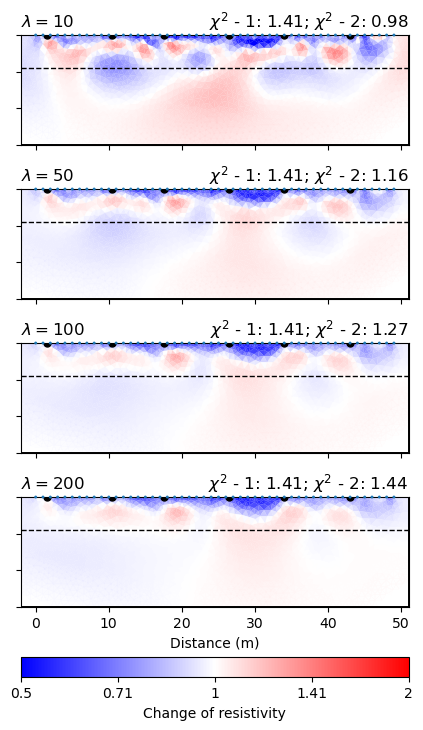

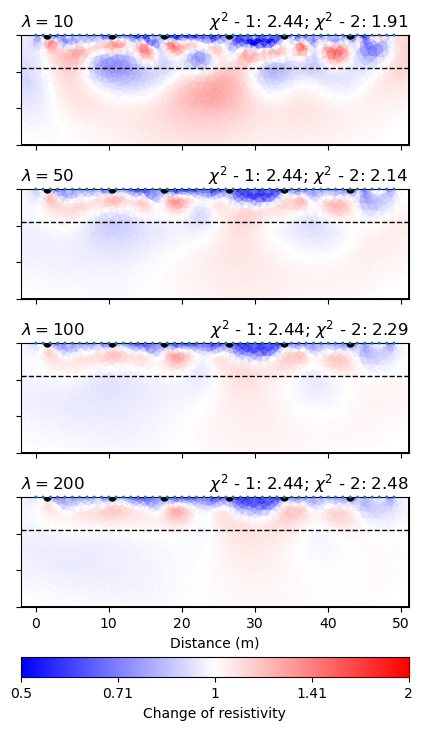

In [5]:
# Veränderung im Vergleich zu vorherigem


for chi2, m, name in zip([chi2_oT, chi2_wT], [results_tl, results_tl_Tcorr], ['withoutTcorr', 'withTcorr']):
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(5, 4*2.5))
    plt.subplots_adjust(hspace=-0.5)
    for nr,model_nr, lam in zip([0,1,2,3],[0,2,4,6], [10,50,100,200]):
        ratio = m[model_nr+1] / m[model_nr]
        bild2 = manager[0].showResult(model= ratio,coverage = manager[0].coverage(),
                cMin=1/2, cMax=2, cMap= 'bwr', ax= axs[nr], label = 'Change of resistivity', logScale= True)
        if nr < 3:
            cb = bild2[-1]
            cb.remove() 
            axs[nr].xaxis.set_ticklabels([])  # Unterdrückt die x-Achse Labels
        if nr == 3:
            axs[nr].set_xlabel('Distance (m)')
            
        axs[nr].yaxis.set_ticklabels([])  # Unterdrückt die y-Achse Labels
        axs[nr].set_title('$\chi^2$ - 1: '+ str(chi2[nr][0]) + '; $\chi^2$ - 2: ' + str(chi2[nr][1]), loc = 'right')
        axs[nr].set_title('$\lambda = $'+ str(lam), loc = 'left')
        # Prinzenpark
        axs[nr].plot(1.5,0, '.', markersize = '10', color = 'black')
        axs[nr].plot(10.5,0, '.', markersize = '10', color = 'black')
        axs[nr].plot(17.5,0, '.', markersize = '10', color = 'black')
        axs[nr].plot(26.5,0, '.', markersize = '10', color = 'black')
        axs[nr].plot(34,0, '.', markersize = '10 ', color = 'black')
        axs[nr].plot(43,0, '.', markersize = '10 ', color = 'black')
        axs[nr].set_ylim(-15, 0)
        axs[nr].axhline(y=-4.5, color='k', linewidth = 1,linestyle='--')

    fig.savefig('./Fig7_8/Diff_Lam15_%s_Fehler3.png' % name, bbox_inches = 'tight', dpi=300)